In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import histogram

In [46]:
# Importing ISBG as dataframe
ISBG = pd.read_excel("./data/ISBSG-whole.xlsx",header=3)
# ISBG.set_index("Project ID", inplace=True)

# Find standard data explortation below

In [47]:
ISBG.head()


,ISBSG Project ID,Data Quality Rating,UFP rating,Year of Project,Industry Sector,Organisation Type,Application Group,Application Type,Development Type,Development Platform,...,Added count,Changed count,Deleted count,COSMIC Entry,COSMIC Exit,COSMIC Read,COSMIC Write,Lines of Code,Lines of Code not Statements,Other Size Units
0,10001,D,A,1998,Service Industry,Recreation & Personnel Services;,Business Application,Transaction/Production System;,New Development,MR,...,237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10011,B,A,1996,Construction,Construction;,Business Application,Stock control & order processing;,New Development,Multi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10012,B,A,2002,Wholesale & Retail,Billing;,Business Application,Billing;,Enhancement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10014,B,A,2004,NaN,NaN,NaN,NaN,Enhancement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10015,B,A,2000,Wholesale & Retail,Wholesale & Retail Trade;,Business Application,Management Information System;,Enhancement,MF,...,35.0,347.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
nan_counts = ISBG_interest.isna().sum()

# Create a dictionary with column names as keys and their NaN counts as values
nandict = {}
for column, count in nan_counts.items():
    nandict[column] = count

# Convert the dictionary into a DataFrame
nandictdf = pd.DataFrame(list(nandict.items()), columns=['Column', 'NaN Count'])
nandictdf = nandictdf.transpose()
nandictdf


,0,1,2,3,4,5,6,7,8
Column,Max Team Size,COSMIC Write,COSMIC Entry,COSMIC Exit,Functional Size,Project Elapsed Time,Development Platform,Primary Programming Language,Summary Work Effort
NaN Count,3802,5703,5703,5703,190,726,1417,1342,16


In [49]:
#Cols of interest:
cols_needed = ['Max Team Size','COSMIC Write','COSMIC Entry','COSMIC Exit','Functional Size','Project Elapsed Time','Development Platform','Max Team Size','Primary Programming Language','Summary Work Effort']
ISBG_interest = ISBG[cols_needed]
ISBG_interest.head()

,Max Team Size,COSMIC Write,COSMIC Entry,COSMIC Exit,Functional Size,Project Elapsed Time,Development Platform,Max Team Size,Primary Programming Language,Summary Work Effort
0,5.0,NaN,NaN,NaN,237.0,6.0,MR,5.0,Oracle,1850.0
1,NaN,NaN,NaN,NaN,443.0,2.6,Multi,NaN,Access,796.0
2,NaN,NaN,NaN,NaN,76.0,NaN,NaN,NaN,COBOL,1100.0
3,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,28.0
4,NaN,NaN,NaN,NaN,382.0,3.0,MF,NaN,COBOL,22000.0


In [50]:
ISBG_interest.info()
ISBG_interest.describe()
total_count = len(ISBG_interest['COSMIC Write'])
total_count_afterNANremoval = total_count - 5703
print(total_count,total_count_afterNANremoval)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5957 entries, 0 to 5956
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Max Team Size                 2155 non-null   float64
 1   COSMIC Write                  254 non-null    float64
 2   COSMIC Entry                  254 non-null    float64
 3   COSMIC Exit                   254 non-null    float64
 4   Functional Size               5767 non-null   float64
 5   Project Elapsed Time          5231 non-null   float64
 6   Development Platform          4540 non-null   object 
 7   Max Team Size                 2155 non-null   float64
 8   Primary Programming Language  4615 non-null   object 
 9   Summary Work Effort           5941 non-null   float64
dtypes: float64(8), object(2)
memory usage: 465.5+ KB
5957 254


In [51]:
df_clean = ISBG_interest.dropna(subset=['COSMIC Write'])
total_count = len(df_clean)
df_clean

,Max Team Size,COSMIC Write,COSMIC Entry,COSMIC Exit,Functional Size,Project Elapsed Time,Development Platform,Max Team Size,Primary Programming Language,Summary Work Effort
9,NaN,32.0,68.0,71.0,183.0,2.8,PC,NaN,NaN,460.0
44,4.0,110.0,232.0,287.0,826.0,44.0,Multi,4.0,Java,2503.0
70,1.0,1.0,7.0,5.0,26.0,12.0,PC,1.0,C#,40.0
152,NaN,7.0,46.0,18.0,78.0,24.0,NaN,NaN,C,270.0
172,2.0,8.0,22.0,19.0,55.0,5.0,Multi,2.0,ASP,740.0
...,...,...,...,...,...,...,...,...,...,...
5817,6.0,542.0,145.0,279.0,1511.0,25.0,PC,6.0,Visual Studio .Net,11352.0
5834,1.0,3.0,4.0,1.0,9.0,NaN,Multi,1.0,ABAP,80.0
5868,10.0,2.0,3.0,4.0,11.0,13.0,MF,10.0,COBOL,1370.0
5943,1.0,1.0,5.0,4.0,16.0,12.0,PC,1.0,C#,32.0


In [52]:
import pandas as pd
from sklearn.impute import KNNImputer

# One-hot encode non-numeric (categorical) columns.
df_encoded = pd.get_dummies(df_clean)

# Create an instance of KNNImputer with desired number of neighbors.
imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

df_imputed.head()


,Max Team Size,COSMIC Write,COSMIC Entry,COSMIC Exit,Functional Size,Project Elapsed Time,Max Team Size,Summary Work Effort,Development Platform_MF,Development Platform_MR,...,Primary Programming Language_Java,Primary Programming Language_Oracle,Primary Programming Language_PHP,Primary Programming Language_PL/I,Primary Programming Language_RPG,Primary Programming Language_Script Language,Primary Programming Language_TNSDL,Primary Programming Language_Visual Basic,Primary Programming Language_Visual C++,Primary Programming Language_Visual Studio .Net
0,4.0,32.0,68.0,71.0,183.0,2.8,4.0,460.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,110.0,232.0,287.0,826.0,44.0,4.0,2503.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,7.0,5.0,26.0,12.0,1.0,40.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.6,7.0,46.0,18.0,78.0,24.0,3.6,270.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,8.0,22.0,19.0,55.0,5.0,2.0,740.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
from sklearn.preprocessing import normalize
# from sklearn.preprocessing import Sta
normalized_data = normalize(df_imputed)
df_normalized = pd.DataFrame(normalized_data, columns=df_imputed.columns)
df_normalized.head()


,Max Team Size,COSMIC Write,COSMIC Entry,COSMIC Exit,Functional Size,Project Elapsed Time,Max Team Size,Summary Work Effort,Development Platform_MF,Development Platform_MR,...,Primary Programming Language_Java,Primary Programming Language_Oracle,Primary Programming Language_PHP,Primary Programming Language_PL/I,Primary Programming Language_RPG,Primary Programming Language_Script Language,Primary Programming Language_TNSDL,Primary Programming Language_Visual Basic,Primary Programming Language_Visual C++,Primary Programming Language_Visual Studio .Net
0,0.007908,0.063268,0.134444,0.140376,0.361814,0.005536,0.007908,0.909477,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001501,0.041289,0.087083,0.107728,0.310046,0.016516,0.001501,0.939521,0.0,0.0,...,0.000375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.020004,0.020004,0.140028,0.100020,0.520104,0.240048,0.020004,0.800160,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.012566,0.024434,0.160565,0.062830,0.272262,0.083773,0.012566,0.942445,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.002693,0.010772,0.029623,0.025583,0.074056,0.006732,0.002693,0.996396,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
print(df_normalized.columns)

Index(['Max Team Size', 'COSMIC Write', 'COSMIC Entry', 'COSMIC Exit',
       'Functional Size', 'Project Elapsed Time', 'Max Team Size',
       'Summary Work Effort', 'Development Platform_MF',
       'Development Platform_MR', 'Development Platform_Multi',
       'Development Platform_PC', 'Primary Programming Language_.Net',
       'Primary Programming Language_ABAP', 'Primary Programming Language_ASP',
       'Primary Programming Language_ASP.Net',
       'Primary Programming Language_AppBuilder',
       'Primary Programming Language_Assembler',
       'Primary Programming Language_C', 'Primary Programming Language_C#',
       'Primary Programming Language_C++',
       'Primary Programming Language_COBOL',
       'Primary Programming Language_J2EE',
       'Primary Programming Language_Java',
       'Primary Programming Language_Oracle',
       'Primary Programming Language_PHP', 'Primary Programming Language_PL/I',
       'Primary Programming Language_RPG',
       'Primary Program

<Axes: >

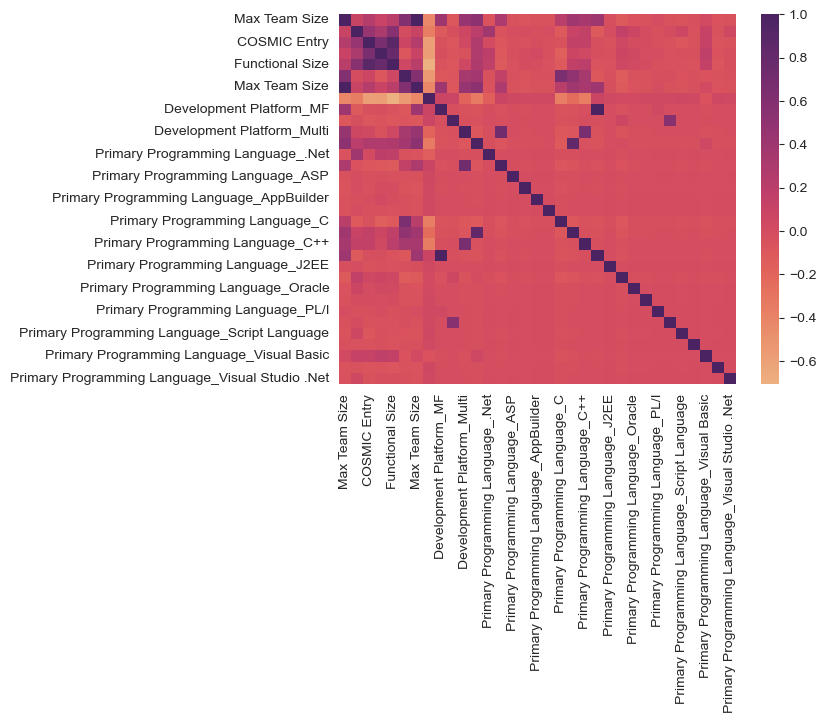

In [59]:
import seaborn as sns

corr = df_normalized.corr()
cmap = sns.color_palette("flare", as_cmap=True)
# plot the heatmap
sns.heatmap(corr,cmap=cmap)

In [63]:
sns.pairplot(ISBG_interest, hue="Functional Size")

ValueError: Data must be 1-dimensional, got ndarray of shape (5957, 2) instead